In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score ,confusion_matrix, roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read and analysis the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data = data.drop(columns='Cabin', axis=1)

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data analysis

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [14]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

In [15]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

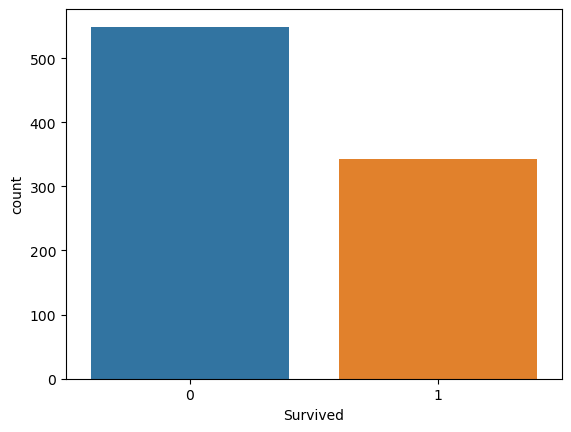

In [16]:
sur = sns.countplot(x='Survived',data=data)
plt.show()

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

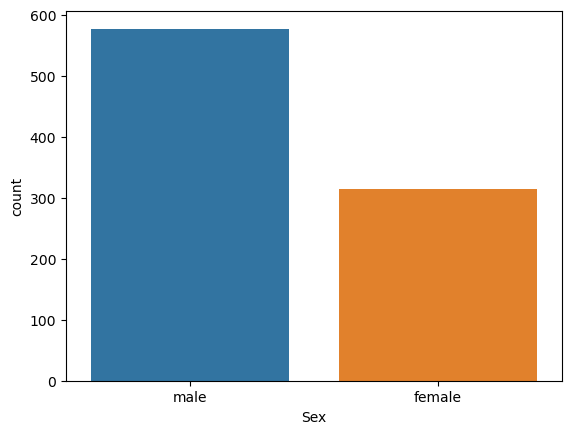

In [18]:
sur = sns.countplot(x='Sex',data=data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

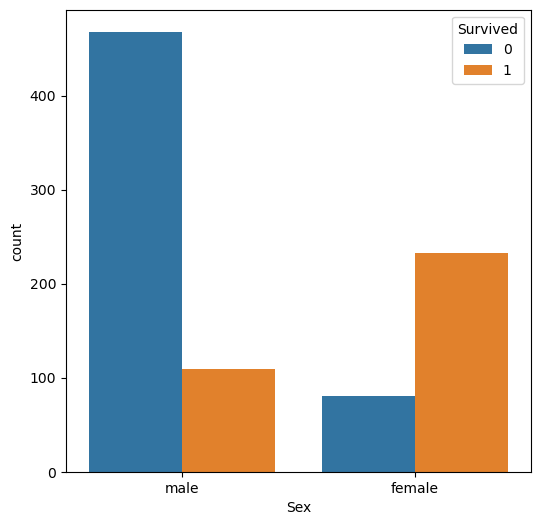

In [19]:
plot = plt.figure(figsize=(6,6))
sns.countplot(x='Sex',hue='Survived', data = data)

<Axes: xlabel='Pclass', ylabel='count'>

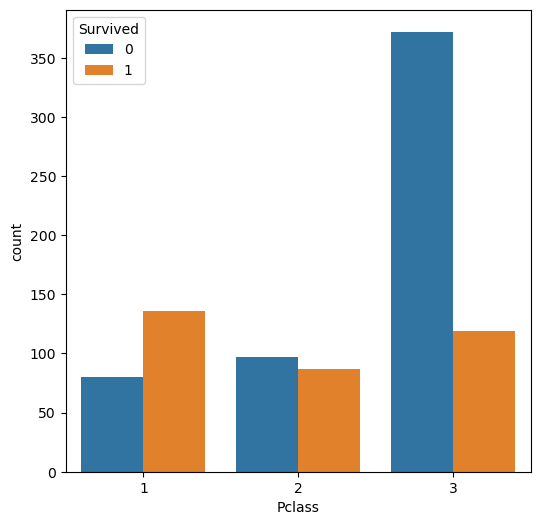

In [20]:
plot = plt.figure(figsize=(6,6))
sns.countplot(x='Pclass',hue='Survived', data = data)

<Axes: xlabel='Age', ylabel='count'>

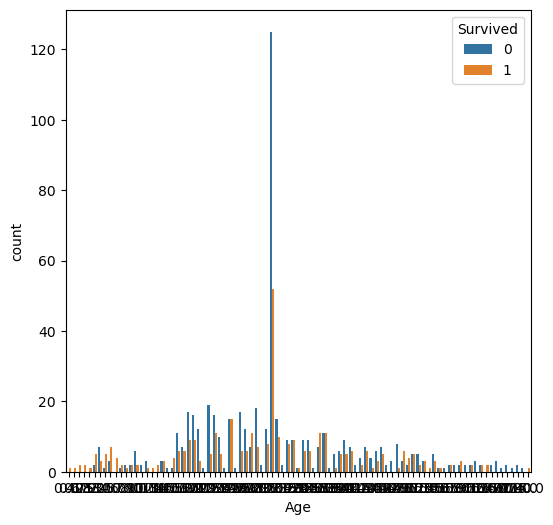

In [21]:
plot = plt.figure(figsize=(6,6))
sns.countplot(x='Age',hue='Survived', data = data)

<Axes: xlabel='Embarked', ylabel='count'>

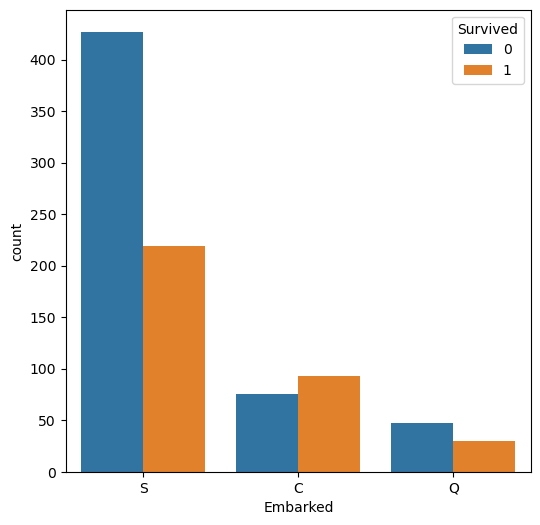

In [22]:
plot = plt.figure(figsize=(6,6))
sns.countplot(x='Embarked',hue='Survived', data = data)

# Divided into categorical and numerical data

In [23]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")


numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns: ",numerical_col)

categorical columns:  ['Name', 'Sex', 'Ticket', 'Embarked']


numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Encoded the data

In [24]:
OE = OrdinalEncoder()
for i in data.columns:
    if data [i].dtypes=='object':
        data[i] = OE.fit_transform(data[i].values.reshape(-1,1))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


# Split the features and target value

In [25]:
X = data.drop('Survived',axis=True)
Y = data['Survived']

In [26]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [27]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting training and testing the data 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=241)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(891, 10) (668, 10) (223, 10)


# Model training 

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n=====================Train Result=================")
        
        print(f"acccuracy score :{accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=====================Test Result==================")
        print(f"accuracy score :{accuracy_score(y_test, pred) * 100:.2f}%")
         
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

# Predict the model

In [33]:
metric_score(model,X_train,X_test,Y_train,Y_test,train=True)
metric_score(model,X_train,X_test,Y_train,Y_test,train=False)


=====================Train Result=================
acccuracy score :78.89%

=====================Test Result==================
accuracy score :82.96%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       135
           1       0.81      0.74      0.77        88

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



# Using Hyperparameter tuning

In [34]:
grid_param = {
    'criterian':['gini','entropy'],
    'max_depth':range(10,15),
    'min_sample_leaf':range(3,7),
    'min_smaple_split': range(3,8),
    'max_leaf_nodes':range(5,15)
}

In [35]:
grid_search = GridSearchCV(estimator=model,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs = -1)

# model training

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split =2,max_depth= 14, min_samples_leaf= 4)

model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=4)

# Predict the model

In [37]:
metric_score(model,X_train,X_test,Y_train,Y_test,train=True)
metric_score(model,X_train,X_test,Y_train,Y_test,train=False)


=====================Train Result=================
acccuracy score :91.92%

=====================Test Result==================
accuracy score :79.37%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       135
           1       0.76      0.69      0.73        88

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



#  using Randomforest classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

#  Split the feature and target 

In [39]:
X = data.drop('Survived', axis=True)
y = data['Survived']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=421)

In [41]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n=====================Train Result=================")
        
        print(f"acccuracy score :{accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=====================Test Result==================")
        print(f"accuracy score :{accuracy_score(y_test, pred) * 100:.2f}%")
         
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

# Model training 

In [42]:
random_model = RandomForestClassifier()

random_model.fit(X_train, Y_train)

RandomForestClassifier()

# Predict the model

In [43]:
metric_score(model,X_train,X_test,Y_train,Y_test,train=True)
metric_score(model,X_train,X_test,Y_train,Y_test,train=False)


=====================Train Result=================
acccuracy score :88.92%

=====================Test Result==================
accuracy score :88.34%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       123
           1       0.91      0.82      0.86       100

    accuracy                           0.88       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.89      0.88      0.88       223

